# Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import anything you need here, remember to set the seed to ensure reproducibility

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as ss
import scipy.optimize as so
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from scipy.optimize import minimize
from scipy.special import gammaln
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline
np.random.seed(9000)

# Load data

In [ ]:
# Make a copy of the code and data file, then replace this with your data location
file_dir = "/content/drive/MyDrive/DATASCI 9000 Intro ML/Final Project/heart.csv"
heart_data = pd.read_csv(file_dir)

# Preview Data
heart_data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Data Columns:

1. age

2. sex

3. chest pain type (4 values)

4. resting blood pressure

5. serum cholestoral in mg/dl

6. fasting blood sugar > 120 mg/dl

7. resting electrocardiographic results (values 0,1,2)

8. maximum heart rate achieved

9. exercise induced angina

10. oldpeak = ST depression induced by exercise relative to rest

11. the slope of the peak exercise ST segment

12. number of major vessels (0-3) colored by flourosopy

13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

14. target - heart disease label (0 - false, 1 - true)

More about thal: https://my.clevelandclinic.org/health/diseases/14508-thalassemias

In [ ]:
# split the data
X = heart_data.drop('target', axis='columns')
y = heart_data.target.values
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Logistic Regression

1. No Regularization

In [ ]:
# train
model = LogisticRegression(penalty = None, max_iter = 100000)
model.fit(Xtrain, ytrain)

LogisticRegression(max_iter=100000, penalty=None)

In [ ]:
# show parameter estimates
coefficients = model.coef_.flatten()
print("No Regularizer Parameter Estimates:")
for feature, coef in zip(heart_data.columns, coefficients):
    print(f"{feature}: {coef:.4f}")

No Regularizer Parameter Estimates:
age: -0.0156
sex: -1.9158
cp: 0.8005
trestbps: -0.0154
chol: -0.0053
fbs: 0.1003
restecg: 0.4828
thalach: 0.0216
exang: -1.0658
oldpeak: -0.5826
slope: 0.3928
ca: -0.6934
thal: -0.9428


Raw Accuracy:
0.8668831168831169
Precision:
0.8426966292134831
Recall:
0.9202453987730062


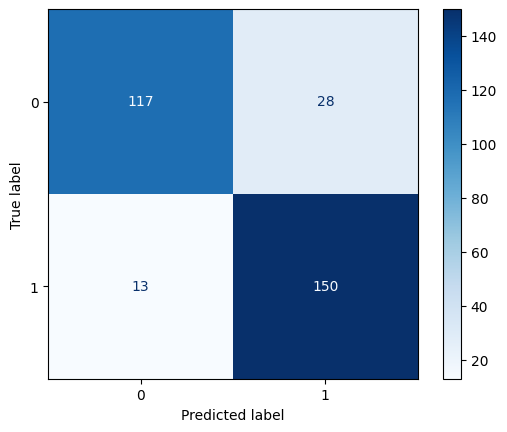

In [ ]:
# test
ypred = model.predict(Xtest)
print("Raw Accuracy:")
print(accuracy_score(ytest, ypred))
print("Precision:")
print(precision_score(ytest, ypred))
print("Recall:")
print(recall_score(ytest, ypred))

cfm = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(ytest, ypred))
cfm.plot(cmap = plt.cm.Blues)

2. Ridge Regularization

In [ ]:
# train
model = LogisticRegression(penalty = 'l2', max_iter = 100000)
model.fit(Xtrain, ytrain)

LogisticRegression(max_iter=100000)

In [ ]:
# show parameter estimates
coefficients = model.coef_.flatten()
print("Ridge Parameter Estimates:")
for feature, coef in zip(heart_data.columns, coefficients):
    print(f"{feature}: {coef:.4f}")

Ridge Parameter Estimates:
age: -0.0144
sex: -1.7601
cp: 0.7821
trestbps: -0.0151
chol: -0.0050
fbs: 0.0794
restecg: 0.4587
thalach: 0.0215
exang: -0.9898
oldpeak: -0.5773
slope: 0.3718
ca: -0.6755
thal: -0.9174


Raw Accuracy:
0.8668831168831169
Precision:
0.8426966292134831
Recall:
0.9202453987730062


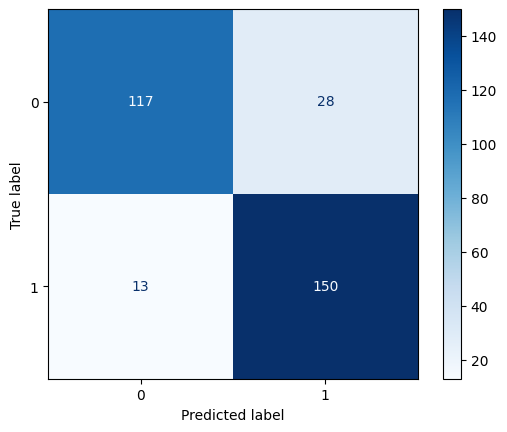

In [ ]:
# test
ypred = model.predict(Xtest)
print("Raw Accuracy:")
print(accuracy_score(ytest, ypred))
print("Precision:")
print(precision_score(ytest, ypred))
print("Recall:")
print(recall_score(ytest, ypred))

cfm = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(ytest, ypred))
cfm.plot(cmap = plt.cm.Blues)

3. Lasso Regularization

In [ ]:
# train
model = LogisticRegression(penalty = 'l1', C = 1.0, solver = 'liblinear', max_iter = 100000)
model.fit(Xtrain, ytrain)

LogisticRegression(max_iter=100000, penalty='l1', solver='liblinear')

In [ ]:
# show parameter estimates; for Lasso, pay attention to if some are set to 0
coefficients = model.coef_.flatten()
print("Lasso Parameter Estimates:")
for feature, coef in zip(heart_data.columns, coefficients):
    print(f"{feature}: {coef:.4f}")

Lasso Parameter Estimates:
age: -0.0017
sex: -1.7108
cp: 0.7691
trestbps: -0.0124
chol: -0.0044
fbs: 0.0000
restecg: 0.4865
thalach: 0.0278
exang: -0.9215
oldpeak: -0.5454
slope: 0.3731
ca: -0.6638
thal: -0.8738


Raw Accuracy:
0.8701298701298701
Precision:
0.847457627118644
Recall:
0.9202453987730062


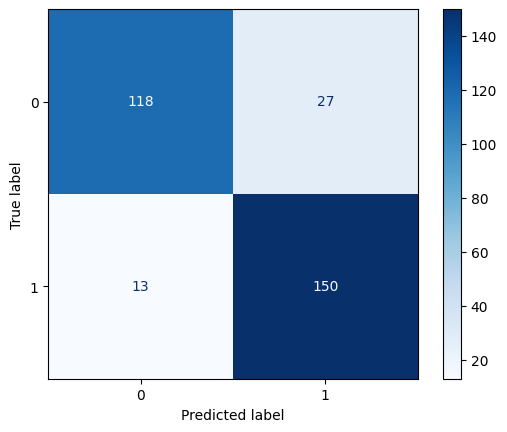

In [ ]:
# test
ypred = model.predict(Xtest)
print("Raw Accuracy:")
print(accuracy_score(ytest, ypred))
print("Precision:")
print(precision_score(ytest, ypred))
print("Recall:")
print(recall_score(ytest, ypred))

cfm = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(ytest, ypred))
cfm.plot(cmap = plt.cm.Blues)

# Random Forest

In [ ]:
# train, remember to set the seed
model = RandomForestClassifier(n_estimators = 100, random_state = 9000)
model.fit(Xtrain, ytrain)

RandomForestClassifier(random_state=9000)

Raw Accuracy:
1.0
Precision:
1.0
Recall:
1.0


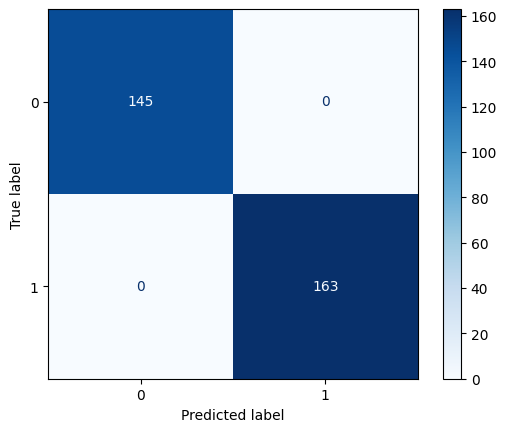

In [ ]:
# test
ypred = model.predict(Xtest)
print("Raw Accuracy:")
print(accuracy_score(ytest, ypred))
print("Precision:")
print(precision_score(ytest, ypred))
print("Recall:")
print(recall_score(ytest, ypred))

cfm = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(ytest, ypred))
cfm.plot(cmap = plt.cm.Blues)

# Support Vector Machine

In [ ]:
# define the hyperparameter search space
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],               # Regularization parameter
    'kernel': ['rbf'],                          # Kernel type
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],     # Equivalence of learning rate
}

# train, remember to set the seed
grid_search = GridSearchCV(SVC(random_state = 9000), param_grid, cv = 5, scoring = 'accuracy', verbose=1)
grid_search.fit(Xtrain, ytrain)
model = grid_search.best_estimator_
model.fit(Xtrain, ytrain)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


SVC(C=10, gamma=0.01, random_state=9000)

Raw Accuracy:
1.0
Precision:
1.0
Recall:
1.0


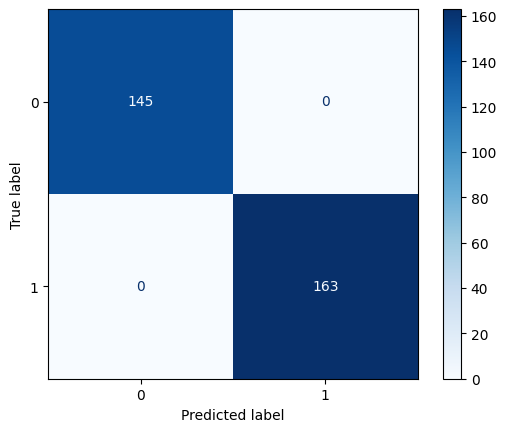

In [ ]:
# test
ypred = model.predict(Xtest)
print("Raw Accuracy:")
print(accuracy_score(ytest, ypred))
print("Precision:")
print(precision_score(ytest, ypred))
print("Recall:")
print(recall_score(ytest, ypred))

cfm = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(ytest, ypred))
cfm.plot(cmap = plt.cm.Blues)